> **Author: Mlungiseleli Notshokovu**

# Project: Investigate a Dataset - TMDb Movie Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('tmdb-movies.csv')

In [46]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
df.shape

(10866, 21)

Possible questions to ask:
--


- Top 10 popular movies of all time?
- Top 10 Best selling movies?
- Top 10 highest runtimes?
- Which top 3 production companies have the most popular movies?
- Does highest budget result in most popular?
- Which factors/attributes determine movie popularity?


# Possible things to visualize:

- A table of top movies by name, budget, revenue, populary, and year
- Top 10 directors by name, movie names
- Budget and Revenue
- Production Companies with the most popular movies

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [49]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The information above shows some columns with miss/null values: 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'


In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Plotting a histogram of all quantifiable columns to see if there is any trend or correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D6AD94E48>,
      dtype=object)

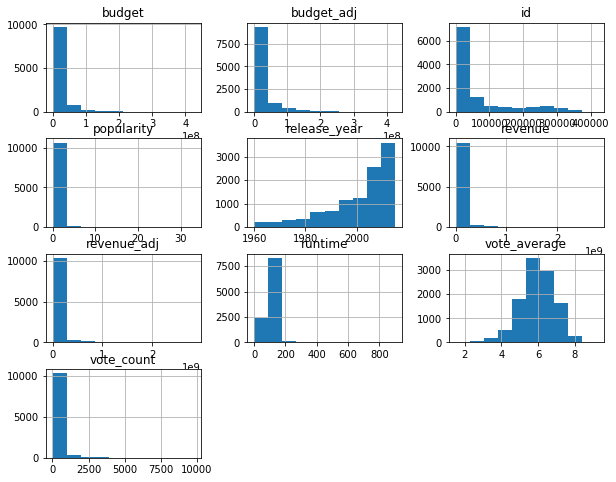

In [51]:
df.hist(figsize=(10,8))

In [52]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


From the correlation table above, the attributes with at least 0.5 have some influence and should be explored further. For example, popularity has a positive correlation with the budget, revenue, and vote_count. This suggests the higher the vote_count, budget, the higher the popularity will be.



### Data Cleaning

In [53]:
#Checking the percentage of null values for each coulmn
df.isnull().sum()/10866 *100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

- 'homepage' has over 70% null/empty values and that will make it hard to derive any conclusive useful findings

In [54]:
#delete 'homepage' from the data
df.drop(['homepage'], inplace=True, axis=1)

In [55]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the top 10 popular movies of all time?

This question will help to discover what kind of movies people love and may even help to produce similar movies in future.

In [56]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Function to get the top 10 list given the columns. This is good for code reuse and will help when investigating other top 10 lists

In [58]:
def get_top_10(df, cols, sorter_col, index_col):
    top_df = df.sort_values(sorter_col, ascending=False)[cols].set_index(index_col)
    
    return top_df.head(10)
    

In [59]:
#Take only the top 10 popular movies
top_10 = get_top_10(df, ['original_title', 'popularity'], 'popularity', 'original_title')
top_10

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


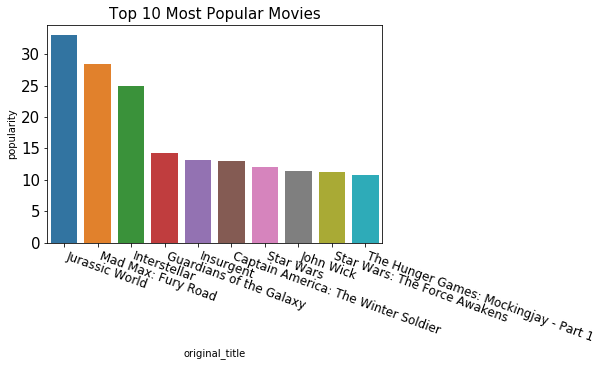

In [60]:
#Plot a graph to display the top most popular movies
sns.barplot(data=top_10, x=top_10.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.title('Top 10 Most Popular Movies', fontsize=15);

Jurassic World seems to be the most popular followed by Mad Max and Interstellar. Action and Adventure movies are quite popular. 

### Research Question 2  What are the top 10 best selling movies?

Possible ways to explore this would be:
sort the data by revenue and take the top 10


In [61]:
revenue_10 = get_top_10(df, ['original_title', 'revenue'], 'revenue', 'original_title')
revenue_10

,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


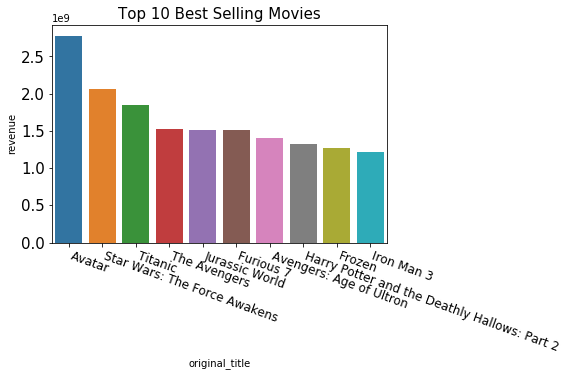

In [62]:
sns.barplot(data=revenue_10, x=revenue_10.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.title('Top 10 Best Selling Movies', fontsize=15);

Question 2 was investigating the most popular movies and Jurrasic World came 1st. One would expect Jurrasic World to also be the top selling movie, but that is not always. Avatar seems to be the most selling movie so far.

### Research Question 3: Which movies have a revenue that is lower than their budget?

There are some movies with a revenue of zero. One can assume there is no revenue or such information was never recorded. Therefore I will disregard any revenue of zero.

Also, to be more fair, I have used the avarage budget as the base to explore the poor/failing revenues.


In [63]:
#Getting the movies with a revenue less than the budget. Also, I added conditions to exclude any data with a budget and revenue equal zero.
revenue_budget_df = df[(df['budget'] > df['revenue']) & (df['revenue'] > 0) & (df['budget'] > 0)]#.sort_values(by=['revenue'], ascending=True)

In [64]:
#get the average budget and explore all revenues >= budget
avg_budget = df['budget'].mean()

In [65]:
revenue_budget_df = revenue_budget_df[revenue_budget_df['budget'] >= avg_budget]

In [66]:
revenue_budget_df[['original_title', 'budget', 'revenue']].set_index('original_title')

,budget,revenue
original_title,,
Mortdecai,60000000,30418560
Blackhat,70000000,17752940
In the Heart of the Sea,100000000,93820758
Pan,150000000,128388320
Child 44,50000000,3324330
...,...,...
Club Paradise,15000000,12308521
SpaceCamp,18000000,9697739
Manhunter,15000000,8620929


In [67]:
#we cannot use the get_top_10 function since we don't want a sorted list
rev = revenue_budget_df.set_index('original_title')

Text(0.5, 1.0, 'Movies with Revenue less than Budget overview')

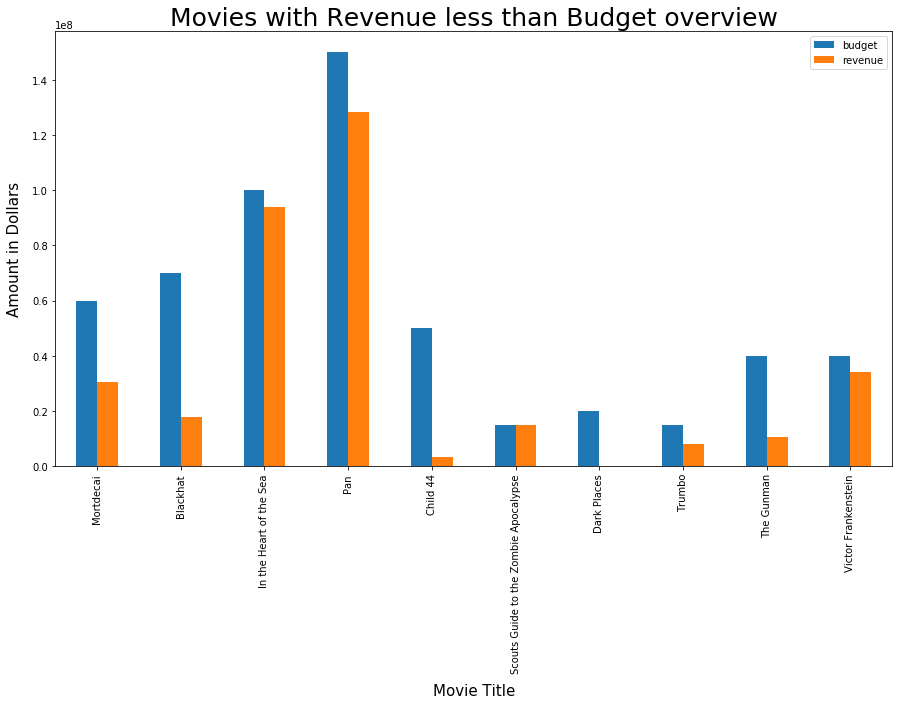

In [68]:
rev[['budget','revenue']].head(10).plot(kind='bar', figsize=(15,8))
plt.ylabel("Amount in Dollars", fontsize = 15, labelpad = 10)
plt.xlabel("Movie Title", fontsize = 15, labelpad = 10)
plt.title('Movies with Revenue less than Budget overview', fontsize = 25)

From the above graph there seems to be a huge difference between the budget and revenue. An assumption that a huge budget leads to a huge revenue has been proven to not always be true.

### Research Question 4: What are the top 10 most voted movies?

Getting the number of votes will give an idea if the movie is popular or not, and how that will influence its revenue.

In [69]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [72]:
vote_10 = get_top_10(df, ['original_title', 'vote_count'], 'vote_count', 'original_title')
vote_10

,vote_count
original_title,
Inception,9767
The Avengers,8903
Avatar,8458
The Dark Knight,8432
Django Unchained,7375
The Hunger Games,7080
Iron Man 3,6882
The Dark Knight Rises,6723
Interstellar,6498


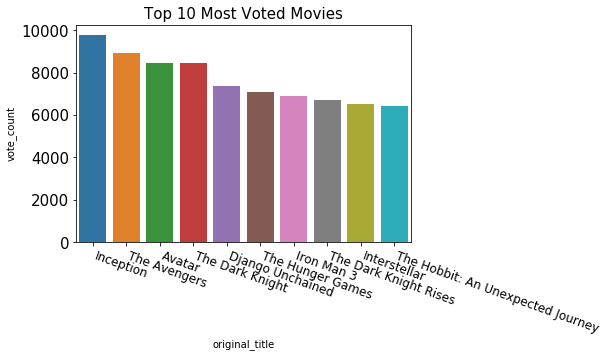

In [73]:
sns.barplot(data=vote_10, x=vote_10.index, y='vote_count');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.title('Top 10 Most Voted Movies', fontsize=15);

The most voted movie is Inception but is not even the best selling or most popular movie. Therefore this may suggest that votes can be good or bad. A high vote count does not yield most popular.

### Research Question 5: What are the top 10 movies with the highest budget?

Investigating if the highest budget yields the highest revenue.

In [76]:
budget_10 = get_top_10(df, ['original_title', 'budget'], 'budget', 'original_title')
budget_10

,budget
original_title,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
John Carter,260000000
Tangled,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


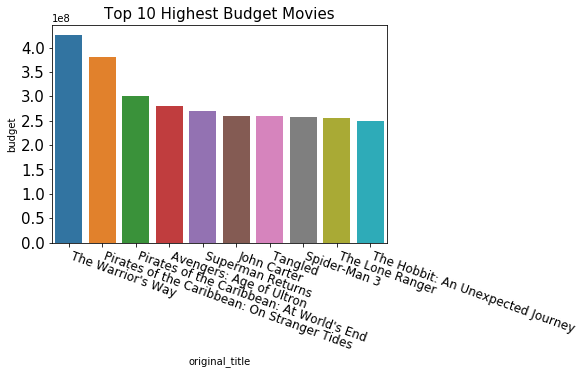

In [77]:
sns.barplot(data=budget_10, x=budget_10.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.title('Top 10 Highest Budget Movies', fontsize=15);

The movie with the highest budget is not even in the top selling list. Budget alone is not a determining factor for highest revenue.

### Research Question 6: What are the top 10 Product Compies with the most success in creating movies?

Exploring this question may answer which production companies has the most success when it comes to making popular movies.

In [78]:
#creating a list of production companies with a revenue > budget and counting the number of occurences for each company
comp_list = df[df['revenue'] > df['budget']]['production_companies'].to_list()

In [79]:
company_list = []
for i in comp_list:
    if '|' in str(i):
        company_list += str(i).split('|')
    else:
        company_list.append(i)
print(company_list)

['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures', 'Fuji Television Network', 'Dentsu', 'Village Roadshow Pictures', 'Kennedy Miller Productions', 'Summit Entertainment', 'Mandeville Films', 'Red Wagon Entertainment', 'NeoReel', 'Lucasfilm', 'Truenorth Productions', 'Bad Robot', 'Universal Pictures', 'Original Film', 'Media Rights Capital', 'Dentsu', 'One Race Films', 'Regency Enterprises', 'Appian Way', 'CatchPlay', 'Anonymous Content', 'New Regency Pictures', 'Paramount Pictures', 'Skydance Productions', 'Twentieth Century Fox Film Corporation', 'Scott Free Productions', 'Mid Atlantic Films', 'International Traders', 'TSG Entertainment', 'Universal Pictures', 'Illumination Entertainment', 'Walt Disney Pictures', 'Pixar Animation Studios', 'Walt Disney Studios Motion Pictures', 'Columbia Pictures', 'Danjaq', 'B24', 'Village Roadshow Pictures', 'Dune Entertainment', 'Anarchos Productions', 'Warner Bros.', 'DNA Films', 'Universal Pictures International (UPI)', 'Film4', 

In [80]:
company_dict = {}
for value in company_list:
    if value not in company_dict:
        company_dict[value] = 1
    else:
        company_dict[value] += 1
print(company_dict)

{'Universal Studios': 10, 'Amblin Entertainment': 56, 'Legendary Pictures': 35, 'Fuji Television Network': 3, 'Dentsu': 10, 'Village Roadshow Pictures': 61, 'Kennedy Miller Productions': 8, 'Summit Entertainment': 40, 'Mandeville Films': 8, 'Red Wagon Entertainment': 6, 'NeoReel': 3, 'Lucasfilm': 15, 'Truenorth Productions': 1, 'Bad Robot': 9, 'Universal Pictures': 326, 'Original Film': 26, 'Media Rights Capital': 13, 'One Race Films': 2, 'Regency Enterprises': 63, 'Appian Way': 9, 'CatchPlay': 1, 'Anonymous Content': 9, 'New Regency Pictures': 28, 'Paramount Pictures': 269, 'Skydance Productions': 9, 'Twentieth Century Fox Film Corporation': 198, 'Scott Free Productions': 26, 'Mid Atlantic Films': 4, 'International Traders': 1, 'TSG Entertainment': 15, 'Illumination Entertainment': 5, 'Walt Disney Pictures': 119, 'Pixar Animation Studios': 16, 'Walt Disney Studios Motion Pictures': 3, 'Columbia Pictures': 175, 'Danjaq': 6, 'B24': 1, 'Dune Entertainment': 47, 'Anarchos Productions': 4,

creating a dataframe from the dictionary and top plot 

In [81]:
company_df = pd.DataFrame(list(company_dict.items()), columns=['production_company', 'counts'])

In [82]:
company_10 = get_top_10(company_df, ['production_company', 'counts'], 'counts', 'production_company')
company_10

,counts
production_company,
Universal Pictures,326
Warner Bros.,301
Paramount Pictures,269
Twentieth Century Fox Film Corporation,198
Columbia Pictures,175
New Line Cinema,144
Walt Disney Pictures,119
Metro-Goldwyn-Mayer (MGM),107
Touchstone Pictures,103


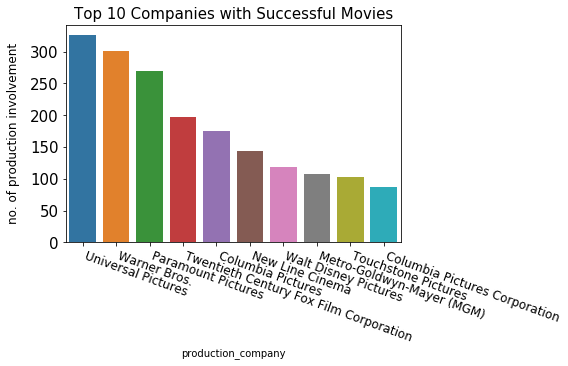

In [83]:
sns.barplot(data=company_10, x=company_10.index, y='counts');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.ylabel("no. of production involvement", fontsize = 12, labelpad = 10)
plt.title('Top 10 Companies with Successful Movies', fontsize=15);

Universal Pictures is the top production company with the most successful movies. Their involvement in producing a movie suggests they have the best resources to yield a popular best seller.

### Research Question 7: Which the top 10 directors have the most success in creating movies?

It may not be quantifiable, but directors play vital role in determining a successful movies. If they have directed the best selling and popular movies, that possibly means their future movies will likely be a success.

In [84]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [85]:
#get a sum of revenue and by director.
director_10 = df[['director', 'revenue']].groupby(['director']).sum().sort_values('revenue', ascending=False).head(10)

In [86]:
director_10

,revenue
director,
Steven Spielberg,9018563772
Peter Jackson,6523244659
James Cameron,5841894863
Michael Bay,4917208171
Christopher Nolan,4167548502
David Yates,4154295625
Robert Zemeckis,3869690869
Chris Columbus,3851491668
Tim Burton,3665414624


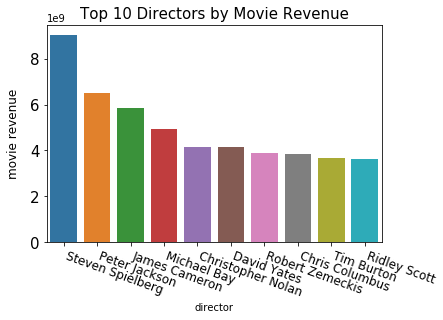

In [87]:
sns.barplot(data=director_10, x=director_10.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=12); plt.yticks(fontsize=15)
plt.ylabel("movie revenue", fontsize = 12, labelpad = 10)
plt.title('Top 10 Directors by Movie Revenue', fontsize=15);

Steven Spielberg directed most selling and popular movies of all time. This may suggest that their future movies will likely be a success.

<a id='conclusions'></a>
## Conclusions


From the above analysis, it is clear that the following features/attribute play a huge part in determining a successful movie and a revenue higher than the budget:
- a high Vote Count
- Popularity influenced by votes
- an above average Budget

Also, from the top 10 production companies with the most successful movies suggests that they have the right resources and budget. Universal Pictures, Warner Bros, Paramount Pictures are the top production companies with the most successful movies

The provided data was good enough to answer some questions to help understand the kind of movies people like to watch by exploring movie popularity, vote count, and best selling list. Action or Adventure seems to be the leading genres. People go to the cinema for action and a good story. The direction seems to also play huge part judging by the directors and the movies they produce. 

The explored data or answers also indicated that a positive correlation between two attributes is not always true for all. For example, a huge budget does not always yield the highest revenue and popularity.

Given more attributes like ratings, would give us a better understanding of how the votes are distributed. This would help to understand why the most voted movie is not the best selling or popular.

The vote average did not depict the most accurate information in understanding movie popularity. Some movies have a small number of votes but with a high vote average.

If the genres were seperated, it would help figure out or compare the different groups by revenue, populary, and vote count. That would give a much more clear analysis in figuring out the kind of genres that make people want to visit their local cinema. The kind of stories worth exploring and those worth disregarding.

